In [1]:
import pandas  as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\DS\13. KNN\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

In [3]:
df.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df[df.duplicated()]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
df.drop_duplicates(inplace=True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Visualization


<AxesSubplot:>

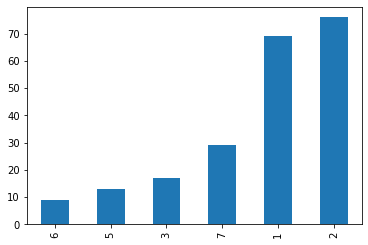

In [9]:
df.Type.value_counts().sort_values().plot(kind='bar')

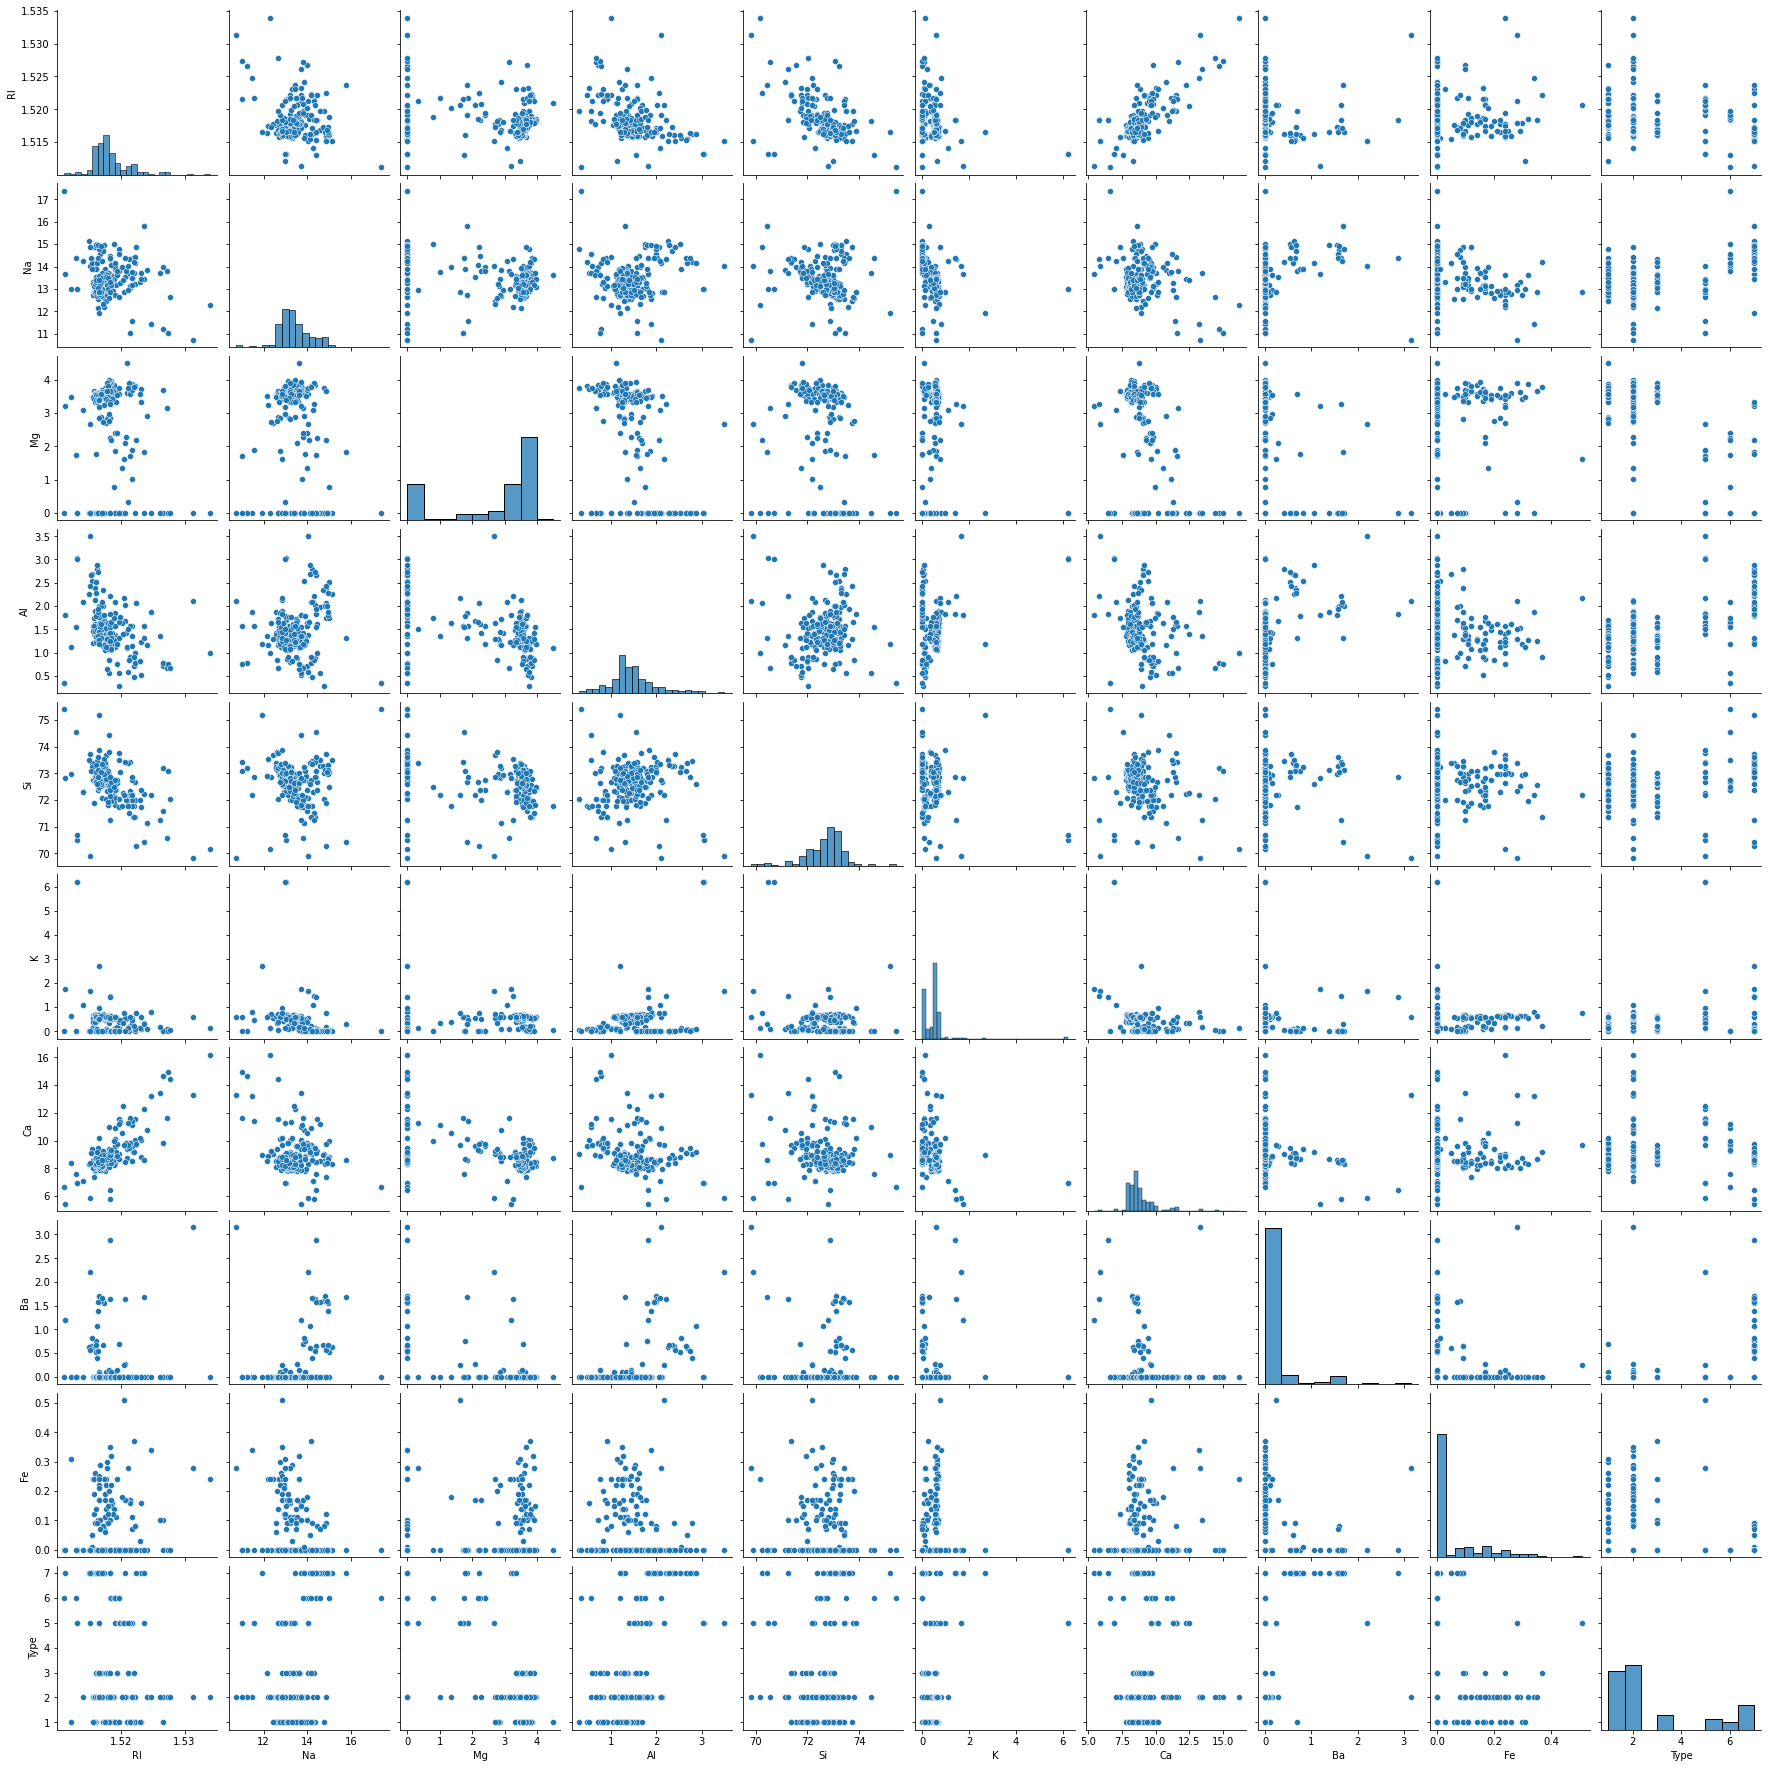

In [10]:
sns.pairplot(df)
plt.show()

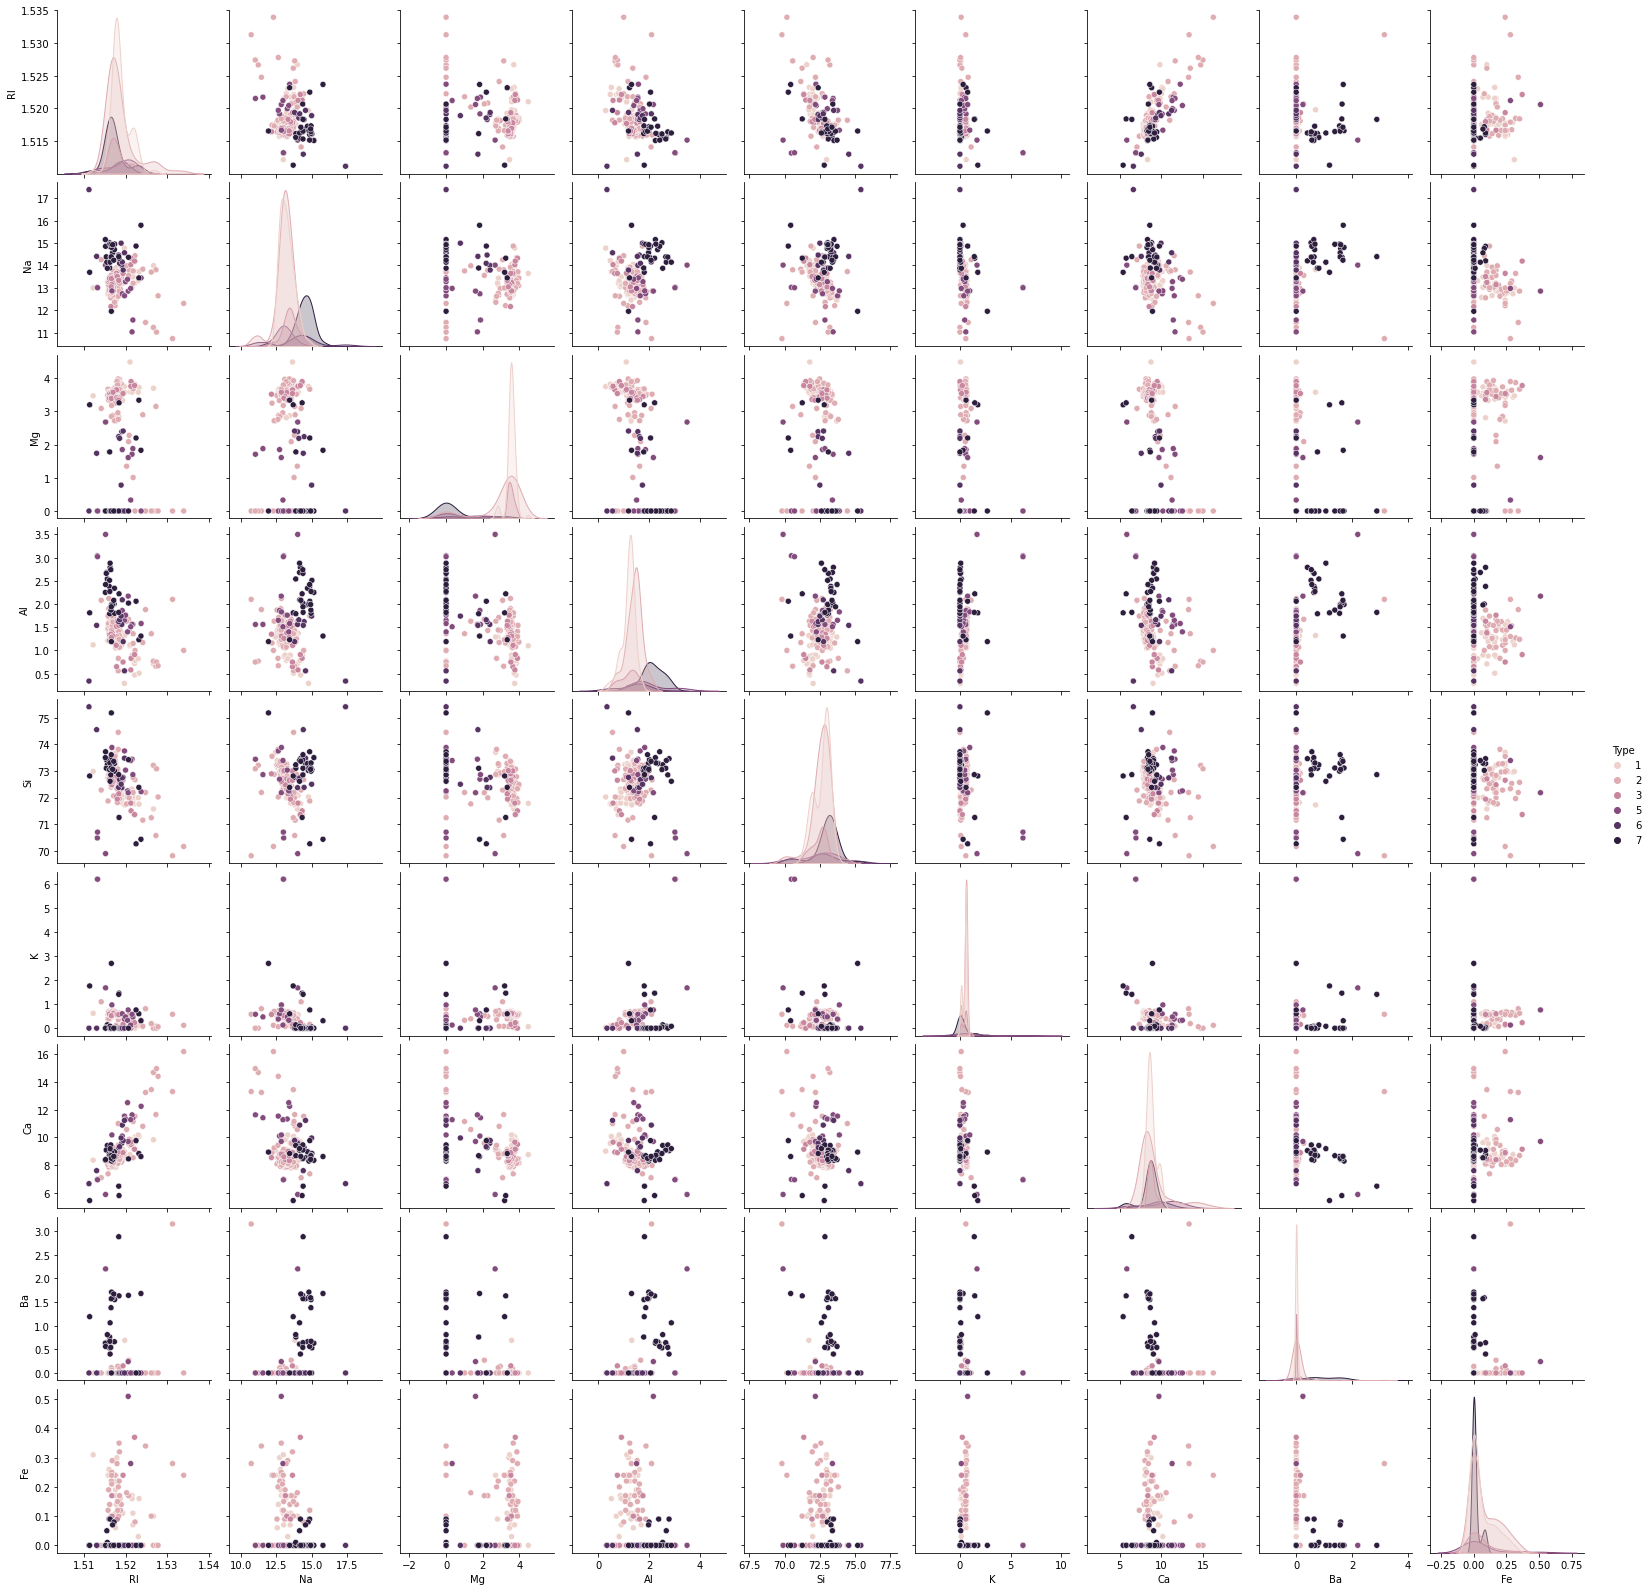

In [11]:
sns.pairplot(df, hue='Type')
plt.show()

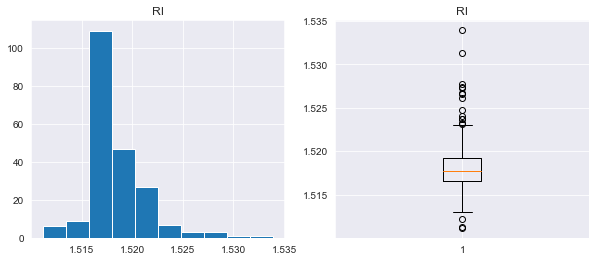

In [12]:
# Boxplot & Histogram
sns.set_style(style='darkgrid')
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),df['RI'].hist(),plt.title("RI")],
[plt.subplot(1,2,2),plt.boxplot(x=df["RI"]), plt.title("RI")]
plt.show()

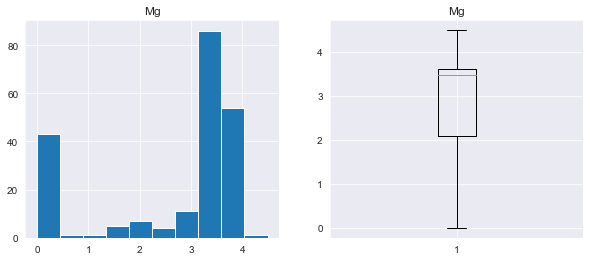

In [13]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),df['Mg'].hist(),plt.title("Mg")],
[plt.subplot(1,2,2),plt.boxplot(x=df["Mg"]), plt.title("Mg")]
plt.show()

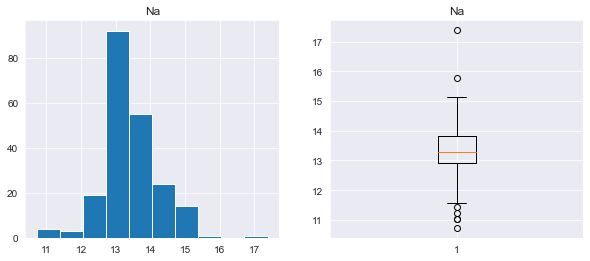

In [17]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),df['Na'].hist(),plt.title("Na")],
[plt.subplot(1,2,2),plt.boxplot(x=df["Na"]), plt.title("Na")]
plt.show()

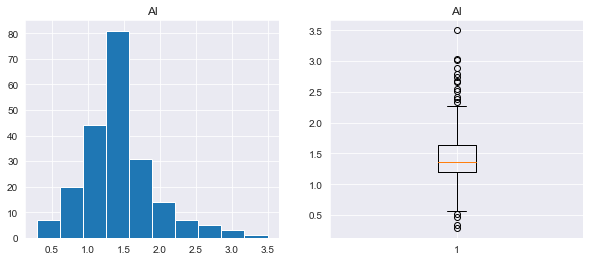

In [18]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),df["Al"].hist(),plt.title("Al")],
[plt.subplot(1,2,2),plt.boxplot(x=df["Al"]), plt.title("Al")]
plt.show()

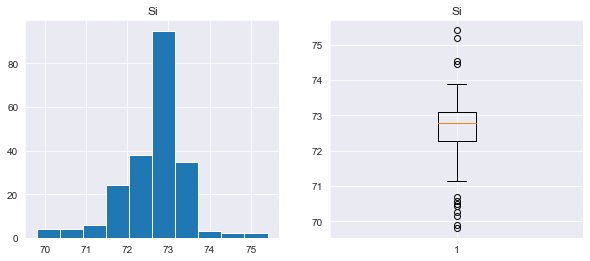

In [19]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),df['Si'].hist(),plt.title("Si")],
[plt.subplot(1,2,2),plt.boxplot(x=df["Si"]), plt.title("Si")]
plt.show()

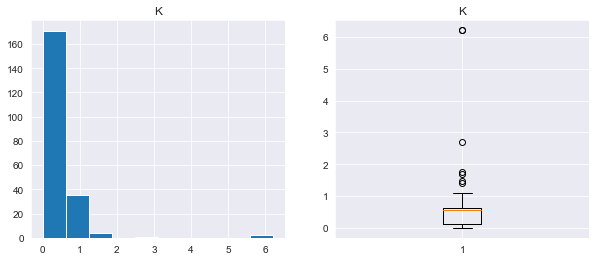

In [20]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),df['K'].hist(),plt.title("K")],
[plt.subplot(1,2,2),plt.boxplot(x=df["K"]), plt.title("K")]
plt.show()

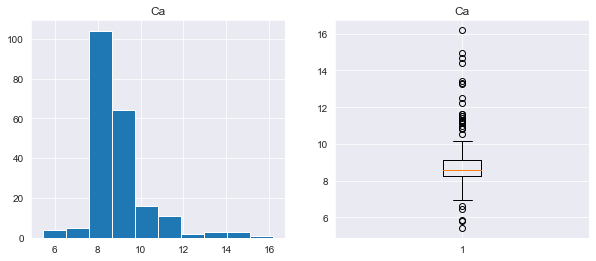

In [21]:
plt.figure(figsize=(10,4))

[plt.subplot(1,2,1), plt.hist(df['Ca']), plt.title('Ca')],
[plt.subplot(1,2,2), plt.boxplot(df['Ca']), plt.title('Ca')]
plt.show()

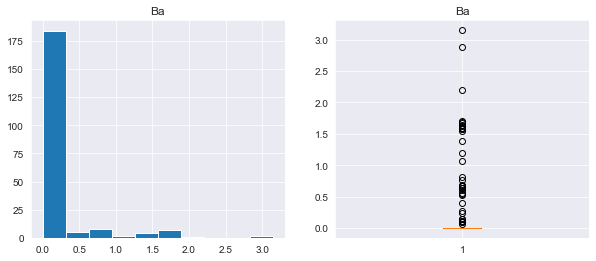

In [22]:
plt.figure(figsize=(10,4))

[plt.subplot(1,2,1), plt.hist(df['Ba']), plt.title('Ba')],
[plt.subplot(1,2,2), plt.boxplot(df['Ba']), plt.title('Ba')]
plt.show()

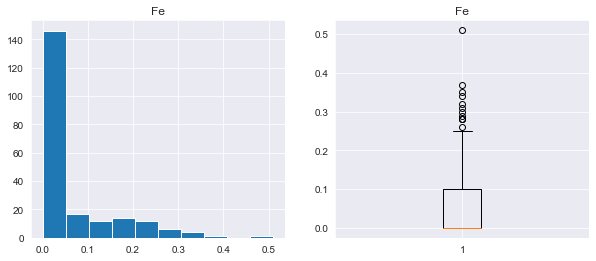

In [23]:
plt.figure(figsize=(10,4))

[plt.subplot(1,2,1), plt.hist(df['Fe']), plt.title('Fe')],
[plt.subplot(1,2,2), plt.boxplot(df['Fe']), plt.title('Fe')]
plt.show()

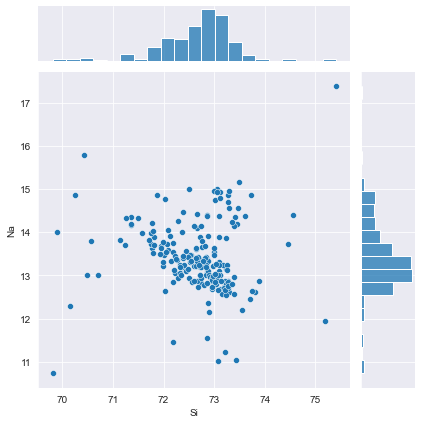

In [24]:
sns.jointplot(data=df, x='Si', y='Na' )
plt.show()

In [25]:
# spliting x and y

x= df.iloc[:,:9]
y= df.iloc[:,-1]

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [29]:
# spliting training and testing data

from sklearn.model_selection import train_test_split

In [30]:
xtrain, xtest,ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)


# KNN Classification


In [31]:
from sklearn.neighbors import KNeighborsClassifier


In [32]:
knn = KNeighborsClassifier()


In [33]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred =  model.predict(xtest)
    
    trainac= model.score(xtrain,ytrain)
    testac = model.score(xtest,ytest)
    
    print(f"Train AC {trainac}\nTest AC {testac}")

In [34]:
predict(KNeighborsClassifier(n_neighbors=10))

Train AC 0.6792452830188679
Test AC 0.7037037037037037


# Hyperparameter Tuning


In [35]:
trainac = []
testac = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain, ytrain))
    testac.append(knn.score(xtest, ytest))

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

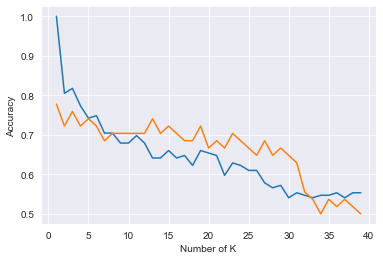

In [36]:
sns.set_style('darkgrid')

plt.plot(range(1,40), trainac)
plt.plot(range(1,40), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid

In [37]:
predict(KNeighborsClassifier(n_neighbors=5))


Train AC 0.7421383647798742
Test AC 0.7407407407407407
